In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as scp
import catboost

#### Combining Datasets

In [2]:
# Read dataset and impute the missing values
from sklearn.impute import KNNImputer
df50 = pd.read_csv("../1950.csv")

genreCat = ["adult standards", "brill building pop", "british comedy", "british dance band", "classic soul", "classic uk pop", "deep adult standards", "doo-wop", "louisiana blues", "merseybeat", "yodeling"]


df50["genre"] = df50["genre"].astype("category")
df50["genre_cat"] = df50["genre"].cat.codes

df50.loc[df50["genre_cat"] == -1, "genre_cat"] = np.nan

imputer = KNNImputer(n_neighbors=5)
dfImputed = imputer.fit_transform(df50.iloc[:,4:])

df50["genre"] = [genreCat[int(round(dfImputed[i][-1],0))] for i in range(len(dfImputed))]
df50["decade"] = ["1950" for i in range(len(df50))]
df50 = df50.drop(columns=["genre_cat"])

display(df50)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Collette,Billy Fury,adult standards,1982,155,44,55,-10,10,73,112,82,4,27,0.0,1950
69,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,adult standards,2012,142,38,65,-8,13,69,146,43,3,27,0.0,1950
70,Stairway Of Love,Terry Dene,classic soul,2015,93,62,62,-7,25,86,120,55,4,27,0.0,1950
71,I've Waited So Long,Anthony Newley,british dance band,2012,137,36,27,-15,25,28,165,64,4,26,0.0,1950


In [3]:
df80 = pd.read_csv("../1980.csv")

genreDictio = {}


df80["genre"] = df80["genre"].astype("category")
df80["genre_cat"] = df80["genre"].cat.codes

df80.loc[df80["genre_cat"] == -1, "genre_cat"] = np.nan

genres = df80["genre"].unique().dropna()
genreCode = df80["genre"].dropna().cat.codes.unique()

for i in range(len(genres)):
    genreDictio[genreCode[i]] = genres[i]

imputer = KNNImputer(n_neighbors=5)
dfImputed = imputer.fit_transform(df80.iloc[:,4:])

df80["genre"] = [genreDictio[int(round(dfImputed[i][-1],0))] for i in range(len(dfImputed))]
df80["decade"] = ["1980" for i in range(len(df80))]
df80 = df80.drop(columns=["genre_cat"])

display(df80)


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Livin' On A Prayer,Bon Jovi,glam metal,1986,123,89,53,-4,29,80,249,8,3,83,0.0,1980
1,Africa,TOTO,album rock,1982,93,37,67,-18,5,73,296,26,3,83,1.0,1980
2,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,75,215,11,16,82,1.0,1980
3,Break My Stride,Matthew Wilder,new wave pop,1983,110,59,92,-11,9,83,184,20,6,81,1.0,1980
4,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,1987,119,82,71,-9,9,87,291,21,5,80,1.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Cold as Ice - 2008 Remaster,Foreigner,album rock,2008,131,71,55,-5,14,51,200,6,3,57,0.0,1980
101,Zulu Nation Throw Down,Afrika Bambaataa,bronx hip hop,2015,108,95,85,-4,10,91,433,76,19,50,0.0,1980
102,It's Only Love - 2008 Remaster,Simply Red,british soul,2008,92,88,67,-5,4,75,299,51,4,50,0.0,1980
103,Lucky Star,Madonna,dance pop,1983,117,81,80,-5,22,93,338,20,4,46,0.0,1980


In [4]:
## Label encoding
df90 = pd.read_csv("../1990.csv")

genre_code_dict = {}
genres = df90["genre"].dropna().unique()
df90["genre"] = df90["genre"].astype("category")
df90["genre_label"] = df90["genre"].cat.codes
for genre in genres:
    genre_code_dict[df90[df90["genre"] == genre].iloc[0]["genre_label"]] = genre

df90.loc[df90["genre_label"] == -1, "genre_label"] = np.nan

imputer_df = imputer.fit_transform(df90.iloc[:,4:])

df90["genre"] = [genre_code_dict[int(round(imputer_df[i][-1]))] for i in range(len(imputer_df))]
df90 = df90.drop(columns=["genre_label"])
df90["decade"] = ["1990" for i in range(len(df90))]

display(df90)


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79,0.0,1990
1,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76,0.0,1990
2,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76,0.0,1990
3,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74,0.0,1990
4,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74,0.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,50,0.0,1990
84,If You Ever,East 17,boy band,1996,140,68,58,-9,31,57,255,18,3,48,0.0,1990
85,Pump Up The Jam,Technotronic,eurodance,2019,125,84,89,-9,5,72,320,1,7,46,0.0,1990
86,Doin' It,LL Cool J,east coast hip hop,1996,95,53,81,-12,12,62,294,34,19,46,0.0,1990


In [5]:
df60 = pd.read_csv("../1960.csv")
df60["decade"] = ["1960" for i in range(len(df60))]
                  
df70 = pd.read_csv("../1970.csv")
df70["decade"] = ["1970" for i in range(len(df70))]

df00 = pd.read_csv("../2000.csv")
df00["decade"] = ["2000" for i in range(len(df00))]

df10 = pd.read_csv("../2010.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

dfTop10 = pd.read_csv("../top10s.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

frames = [df50, df60, df70, df80, df90, df00, df10]
aggregated_df = pd.concat(frames).drop_duplicates()
display(aggregated_df)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,0.0,2010
97,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,0.0,2010
98,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,0.0,2010
99,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32,0.0,2010


Text(0.5, 1.0, 'Correlation matrix')

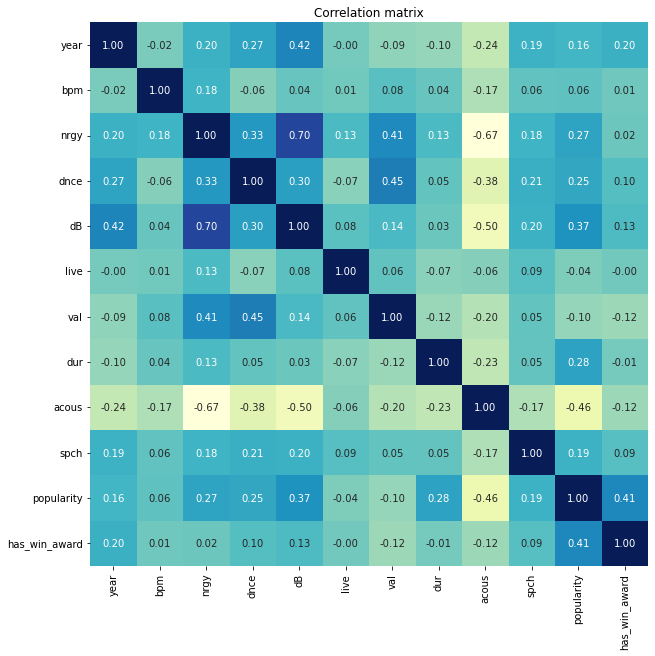

In [6]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    aggregated_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=aggregated_df.select_dtypes(np.number).columns,
    yticklabels=aggregated_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

#### Descriptive Statistics

Text(0.5, 1.0, 'Correlation matrix')

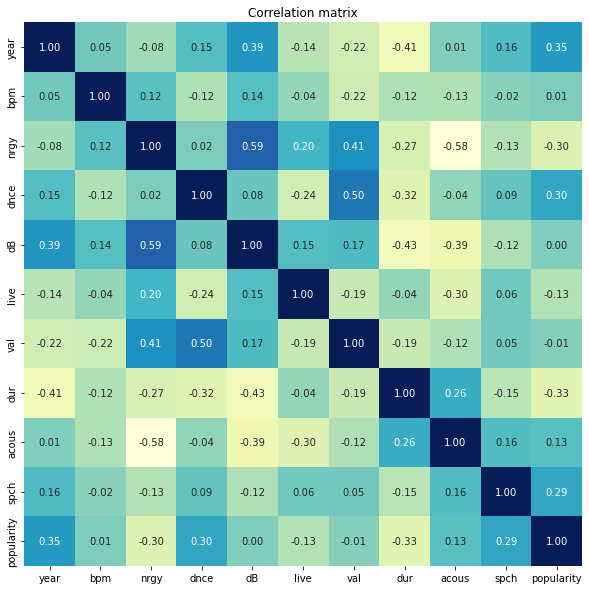

In [7]:
award_winning_df = aggregated_df[aggregated_df["has_win_award"] == 1.0].drop(columns=["has_win_award"])

plt.figure(figsize=(10, 10))

sns.heatmap(
    award_winning_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=award_winning_df.select_dtypes(np.number).columns,
    yticklabels=award_winning_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

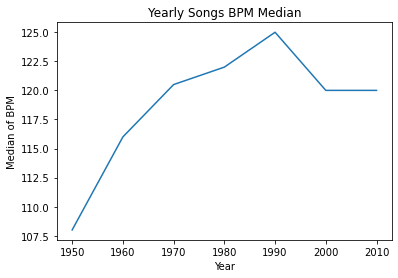

In [8]:
dfs = ["bpm", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"]
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['bpm'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of BPM')
plt.title('Yearly Songs BPM Median')
plt.show()

From the visualization above, we can see the median of the bpm attribute of the songs from 1950-2010. The bpm attribute describes the beat per minute of the song. It can be seen that, overall, the bpm of the songs increases within the 6 decades. That is, songs are becoming faster. However, there is a slight decrease by 5 beats from the 1990s to the 200s, where it plateaus in the 2000s to the 2010s.

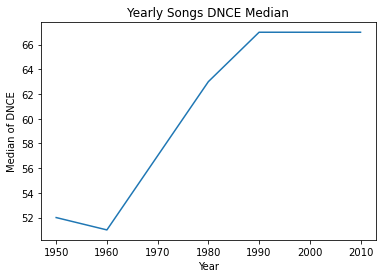

In [9]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dnce'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DNCE')
plt.title('Yearly Songs DNCE Median')
plt.show()

The dnce value overall increases within the 6 of the most popular and iconic songs from each decade increases from 1960s to 2000s after experiencing a slight decrease in the 1950s. This implies that songs (the most popular and iconic songs from each decade) are becoming more danceable.

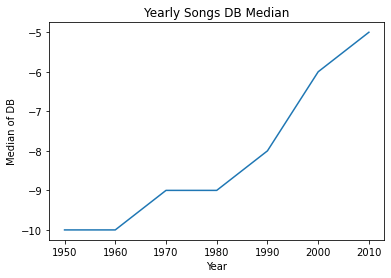

In [10]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dB'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DB')
plt.title('Yearly Songs DB Median')
plt.show()

From the visualization above, we can see the median of the DB attribute of the songs from 1950-2010. The db attribute describes the decibel of the song, that is, the higher the value, the louder the song will be. It can be seen that the median of the db attribute of the songs experiences an increasing trend within the 6 decades. Within the 1950s to the 1960s, there is no major changes that is observed at the median level. It then experiences a slight increase in the 1960s to the 1970s and in the 1980s to the 1990s. The most significant increase can be seen in the 1990s to 2000s, where the median increases by 2 db.

From this observation, it can be observed that, in overall, songs are becoming louder.

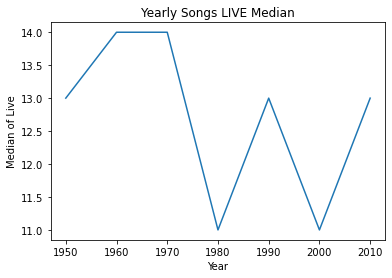

In [11]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['live'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Live')
plt.title('Yearly Songs LIVE Median')
plt.show()

From the visualization above, we can see the median of the live attribute of the songs from 1950-2010. The live attribute describes how likely the song is a live recording. Although there is no a uniform trend within the 6 decades, it is observable there is a decrease in trend for live recorded songs in the 1970s to the 1980s.

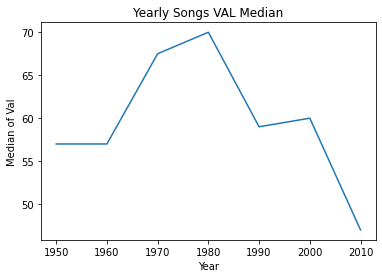

In [12]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['val'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Val')
plt.title('Yearly Songs VAL Median')
plt.show()

From the line plot above we see the median of the val attribute of every song from 1950-2010. The val attribute describes how positive the mood for the song is. We see that initially, between 1950 and 1980, songs were progressively becoming more positive. However, the opposite was seen during the following years. We see that the songs were giving less of a positive mood after 1980.

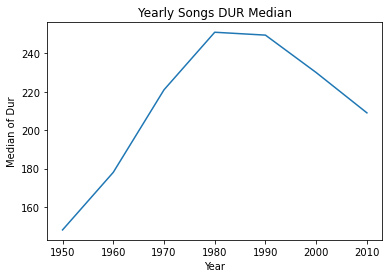

In [13]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dur'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Dur')
plt.title('Yearly Songs DUR Median')
plt.show()

The line plot above displays the median of the dur attribute of every song between 1950-2010. The dur attribute describes the duration of the song in seconds. We see that at first there was a steady increase in duration between 1950-1980, peaking at 251. From 1980 to 2010 we see that the duration of songs are becoming shorter, where the trend is going back towards song durations prior to 1980.

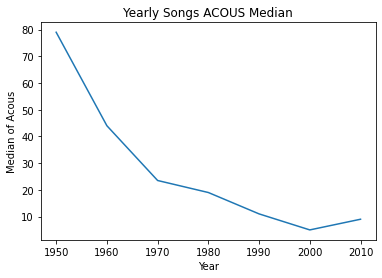

In [14]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['acous'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Acous')
plt.title('Yearly Songs ACOUS Median')
plt.show()

The line plot above displays the median of the acous attribute of every song between 1950-2010. The acous attribute describes acoustic the song is. The trend that we can observe looks pretty obvious since we see that from 1950-2000 there has always been a decrease in the median of the acous attribute, meaning that songs are progressively getting less and less acoustiv throughout the decades, with only a slight increase from 2000 to 2010.

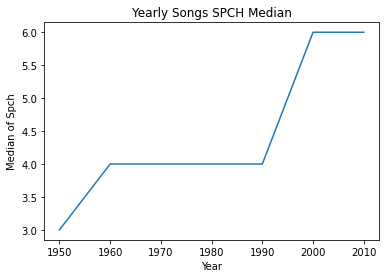

In [15]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['spch'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Spch')
plt.title('Yearly Songs SPCH Median')
plt.show()

The line plot above displays the median of the spch attribute of every song between 1950-2010. The spch attribute describes the amount of spoken words there is in a song. There was an increase in spoken words in a song between 1950 and 1960, but the most interesting part that it plateaus between 1960 and 1990. During the 2000s the value jumped from 4 all the way up to 6, where it stayed the same during the following year (2010).

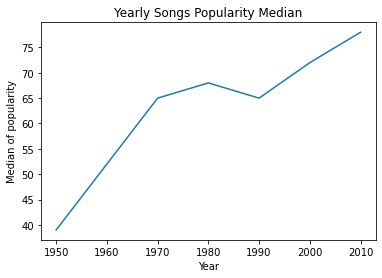

In [16]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['popularity'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of popularity')
plt.title('Yearly Songs Popularity Median')
plt.show()

The line plot above displays the median of the popularity attribute of every song in the combined data set from the 1950s to the 2010s. The popularity attribute describes how popular a song is, where a higher popularity value implies a higher popularity for the song. 

Note that, popularity is assumed to be measured from the this decade's audiences. This assumption is taken as the songs are listened through spotify.

From the line plot above, it can be seen that the popularity attribute of the song majorly increases in the 1950s to the 1970s. It then increases slightly from 65 to 70 in the 1970s to the 1980s before decreasing back in within 1980s to 1990s. Finally, in 1990s onward, the popularity attribute of the most popular and iconic songs in the corresponding decade increases.

The overall increase in song popularity implies that the recent songs are more popular than their predecesors to the current audience. This is likely due to a generation gap between the audience and the song, where songs closer to the current audiences' generation tend to relate more and fit the culture better.

## Data Preprocessing

We must take into account our business objectives, being to predict the popularity based on some of the qualities present in the dataframe.

A song's title is not part of the song's main characteristics that we want to analyze (it does not relate to the actual sound produced or the actual content consumed by the audience). Therefore, the title column will not be selected as the feature in our regression model.

Next, the artist will not been selected to be used in our regression model. Despite the artist's voice has a significant impact in the song and sound production, we aim to predict the popularity measure of an arbitrary song that can be created by any artist. In this model, we aim to abstract away the artist's popularity factor into the song's popularity. That is, songs are considered as artist-independent. We agreed on making a model to ensure that an artist, regardless of popularity, is able to create a song this popular.

Then, we also decided not to include year in our regression model as our model is intended for the current and future artists who aim to produce popular songs. For instance, if a song created in the 1950s is has a higher popularity value, it will not be relevant as artists nowadays can not situate the song to be released in the past. The removal of the "decade" column follows a similar argument.

Afterwards, we chose not to consider whether an artist have won an award. Firstly, it is unrealistic for an unreleased or recently released song to have won an award. Furthermore, we expect our model to predict the popularity of a song purely based on the internal song qualities itself. 

Finally, we chose not to consider whether the song is of a certain genre. This is due to the reason that we can't configure a genre of a song. However, we are able to configure the song to be in a certain genre since a genre can be defined by its bpms, dancability and other internal features of the song.

In [17]:
# Drop the features (Song title, artist, year, decade, has_win_awards)
aggregated_df_dropped = aggregated_df.drop(columns=["title", "artist", "year", "decade", "has_win_award", "genre"])

Also, we did not remove any other features based on correlation. Usually, we would want to remove features with high Pearson correlation coefficients to further optimize the model (not taking into account multiple attributes which correlates strongly and therefore not using it twice increase the speed of training such models.). However, we concluded from the heat map that none of the attributes are correlated strongly enough to warrant the removal of one of them (our rule of thumb is that 2 attributes are strongly correlated if their Pearson score >= 0.9. Futhermore, the dataset only contains 10 features to be analyzed and/or regressed. Hence, removing a somewhat weakly correlating features will only result in data loss. 

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
scaler = MinMaxScaler()

scaler.fit(aggregated_df_dropped)

aggregated_scaled = scaler.transform(aggregated_df_dropped)
aggregated_df_scaled = pd.DataFrame(aggregated_scaled, columns=["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"])

aggregated_df_scaled

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,0.394161,0.297872,0.474359,0.652174,0.087912,0.440860,0.138015,0.75,0.022222,0.676471
1,0.839416,0.297872,0.307692,0.565217,0.769231,0.774194,0.060533,0.86,0.044444,0.529412
2,0.138686,0.457447,0.102564,0.652174,0.351648,0.365591,0.154964,0.81,0.044444,0.514706
3,0.145985,0.393617,0.397436,0.521739,0.109890,0.645161,0.128329,0.70,0.088889,0.500000
4,0.124088,0.340426,0.487179,0.652174,0.120879,0.602151,0.145278,0.67,0.022222,0.500000
...,...,...,...,...,...,...,...,...,...,...
663,0.423358,0.776596,0.743590,0.869565,0.010989,0.870968,0.254237,0.00,0.133333,0.441176
664,0.437956,0.882979,0.628205,0.826087,0.241758,0.666667,0.210654,0.00,0.022222,0.411765
665,0.291971,0.734043,0.743590,0.869565,0.065934,0.462366,0.208232,0.06,0.111111,0.250000
666,0.364964,0.776596,0.705128,0.869565,0.054945,0.537634,0.232446,0.16,0.111111,0.088235


Moreover, we also need to normalize the dataset such that all of the scores are bound to similar scales. Note that in the dataset, there are several features, such as the song duration (dur) and beats per minute (bpm) which is much bigger compared to the values of the other features. If the dataset were not to be scaled, the model designed will emphasize more on those aforementioned features, hence it will result in a big bias towards those features. Consequently, our regression model could be inaccurate.

In [19]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split

In [20]:
X = aggregated_df_scaled.drop('popularity', axis=1)
Y = aggregated_df_scaled['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
531,0.591241,0.787234,0.782051,0.826087,0.307692,0.838710,0.496368,0.19,0.177778
264,0.328467,0.425532,0.320513,0.739130,0.120879,0.677419,0.375303,0.60,0.022222
593,0.437956,0.797872,0.884615,0.869565,0.065934,0.978495,0.244552,0.38,0.088889
454,0.583942,0.840426,0.666667,0.739130,0.186813,0.956989,0.297821,0.38,0.022222
448,0.189781,0.872340,0.397436,0.782609,0.120879,0.580645,0.510896,0.08,0.044444
...,...,...,...,...,...,...,...,...,...
70,0.226277,0.595745,0.564103,0.739130,0.252747,0.860215,0.053269,0.55,0.044444
132,0.343066,0.457447,0.423077,0.652174,0.076923,0.462366,0.167070,0.36,0.022222
289,0.846715,0.202128,0.282051,0.434783,0.087912,0.075269,0.401937,0.80,0.022222
109,0.452555,0.946809,0.487179,0.739130,0.043956,0.892473,0.079903,0.05,0.044444


In [21]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
decision_tree_regressor.fit(X_train, y_train)

y_pred = decision_tree_regressor.predict(X_test)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test})
data

,Popularity (predicted),Popularity (actual)
82,0.617647,0.676471
127,0.294118,0.352941
407,0.661765,0.617647
157,0.264706,0.220588
208,0.838235,0.617647
...,...,...
409,0.705882,0.617647
151,0.308824,0.235294
522,0.705882,0.661765
339,0.794118,0.588235


In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("TEST SCORE")
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

TEST SCORE
MAE: 0.17548287971905177
MSE: 0.04628511852502195
RMSE: 0.21513976509474475
R2: -0.2591924166392252


In [23]:
# import graphviz
# dot_data = export_graphviz(model, out_file='tree.dot')

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [25]:
X = aggregated_df_scaled.drop('popularity', axis=1)
Y = aggregated_df_scaled['popularity']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
531,0.591241,0.787234,0.782051,0.826087,0.307692,0.838710,0.496368,0.19,0.177778
264,0.328467,0.425532,0.320513,0.739130,0.120879,0.677419,0.375303,0.60,0.022222
593,0.437956,0.797872,0.884615,0.869565,0.065934,0.978495,0.244552,0.38,0.088889
454,0.583942,0.840426,0.666667,0.739130,0.186813,0.956989,0.297821,0.38,0.022222
448,0.189781,0.872340,0.397436,0.782609,0.120879,0.580645,0.510896,0.08,0.044444
...,...,...,...,...,...,...,...,...,...
70,0.226277,0.595745,0.564103,0.739130,0.252747,0.860215,0.053269,0.55,0.044444
132,0.343066,0.457447,0.423077,0.652174,0.076923,0.462366,0.167070,0.36,0.022222
289,0.846715,0.202128,0.282051,0.434783,0.087912,0.075269,0.401937,0.80,0.022222
109,0.452555,0.946809,0.487179,0.739130,0.043956,0.892473,0.079903,0.05,0.044444


In [26]:
model = RandomForestRegressor(n_estimators=700)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Y_pred = model.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.537479,0.676471
127,0.356366,0.352941
407,0.665210,0.617647
157,0.504391,0.220588
208,0.641113,0.617647
...,...,...
409,0.680189,0.617647
151,0.339790,0.235294
522,0.613025,0.661765
339,0.606366,0.588235


In [27]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("TEST SCORE")
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


TEST SCORE
MAE: 0.12067493415276562
MSE: 0.02454169015608881
RMSE: 0.1566578761380634
R2: 0.3323402613876768


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = aggregated_df_scaled.drop('popularity', axis=1)
Y = aggregated_df_scaled['popularity']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
531,0.591241,0.787234,0.782051,0.826087,0.307692,0.838710,0.496368,0.19,0.177778
264,0.328467,0.425532,0.320513,0.739130,0.120879,0.677419,0.375303,0.60,0.022222
593,0.437956,0.797872,0.884615,0.869565,0.065934,0.978495,0.244552,0.38,0.088889
454,0.583942,0.840426,0.666667,0.739130,0.186813,0.956989,0.297821,0.38,0.022222
448,0.189781,0.872340,0.397436,0.782609,0.120879,0.580645,0.510896,0.08,0.044444
...,...,...,...,...,...,...,...,...,...
70,0.226277,0.595745,0.564103,0.739130,0.252747,0.860215,0.053269,0.55,0.044444
132,0.343066,0.457447,0.423077,0.652174,0.076923,0.462366,0.167070,0.36,0.022222
289,0.846715,0.202128,0.282051,0.434783,0.087912,0.075269,0.401937,0.80,0.022222
109,0.452555,0.946809,0.487179,0.739130,0.043956,0.892473,0.079903,0.05,0.044444


In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.3528384032796661

In [31]:
print("Koefisien model regresi : " + str(reg.coef_))
print("Intercept model regresi : " + str(reg.intercept_))

Koefisien model regresi : [ 0.03145487 -0.09918181  0.16472003  0.27325787 -0.05822688 -0.15441478
  0.23903149 -0.28280682  0.10245238]
Intercept model regresi : 0.4092313351520896


In [32]:
y_pred = reg.predict(X_test)
Y_pred = reg.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.494723,0.676471
127,0.397599,0.352941
407,0.665912,0.617647
157,0.474569,0.220588
208,0.592044,0.617647
...,...,...
409,0.712540,0.617647
151,0.358998,0.235294
522,0.746007,0.661765
339,0.636164,0.588235


In [33]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.13340301840268765
MSE: 0.028442501664610372
RMSE: 0.16864904881027457
R2: 0.22621819825384282


In [34]:
from sklearn.preprocessing import PolynomialFeatures



In [35]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train,y_train,early_stopping_rounds=10)

Learning rate set to 0.037079
0:	learn: 0.2014564	total: 130ms	remaining: 2m 9s
1:	learn: 0.1993253	total: 131ms	remaining: 1m 5s
2:	learn: 0.1971373	total: 132ms	remaining: 43.7s
3:	learn: 0.1950788	total: 132ms	remaining: 32.9s
4:	learn: 0.1933028	total: 133ms	remaining: 26.5s
5:	learn: 0.1912803	total: 134ms	remaining: 22.1s
6:	learn: 0.1895603	total: 134ms	remaining: 19.1s
7:	learn: 0.1879738	total: 135ms	remaining: 16.7s
8:	learn: 0.1862887	total: 136ms	remaining: 14.9s
9:	learn: 0.1843496	total: 136ms	remaining: 13.5s
10:	learn: 0.1827136	total: 137ms	remaining: 12.3s
11:	learn: 0.1812534	total: 138ms	remaining: 11.3s
12:	learn: 0.1796300	total: 138ms	remaining: 10.5s
13:	learn: 0.1782296	total: 139ms	remaining: 9.79s
14:	learn: 0.1767129	total: 140ms	remaining: 9.18s
15:	learn: 0.1753404	total: 141ms	remaining: 8.64s
16:	learn: 0.1740558	total: 141ms	remaining: 8.17s
17:	learn: 0.1729562	total: 142ms	remaining: 7.75s
18:	learn: 0.1716249	total: 143ms	remaining: 7.38s
19:	learn: 

242:	learn: 0.1082980	total: 293ms	remaining: 912ms
243:	learn: 0.1079566	total: 293ms	remaining: 909ms
244:	learn: 0.1078558	total: 294ms	remaining: 906ms
245:	learn: 0.1075434	total: 295ms	remaining: 904ms
246:	learn: 0.1075172	total: 295ms	remaining: 901ms
247:	learn: 0.1074337	total: 296ms	remaining: 898ms
248:	learn: 0.1074105	total: 297ms	remaining: 895ms
249:	learn: 0.1072678	total: 297ms	remaining: 892ms
250:	learn: 0.1070703	total: 298ms	remaining: 890ms
251:	learn: 0.1070463	total: 299ms	remaining: 887ms
252:	learn: 0.1070091	total: 299ms	remaining: 884ms
253:	learn: 0.1069450	total: 300ms	remaining: 881ms
254:	learn: 0.1069185	total: 301ms	remaining: 878ms
255:	learn: 0.1067312	total: 301ms	remaining: 876ms
256:	learn: 0.1066267	total: 302ms	remaining: 873ms
257:	learn: 0.1066041	total: 303ms	remaining: 870ms
258:	learn: 0.1064610	total: 303ms	remaining: 868ms
259:	learn: 0.1061273	total: 304ms	remaining: 865ms
260:	learn: 0.1059793	total: 305ms	remaining: 862ms
261:	learn: 

501:	learn: 0.0729591	total: 460ms	remaining: 456ms
502:	learn: 0.0728237	total: 461ms	remaining: 455ms
503:	learn: 0.0727679	total: 462ms	remaining: 454ms
504:	learn: 0.0726062	total: 462ms	remaining: 453ms
505:	learn: 0.0724449	total: 463ms	remaining: 452ms
506:	learn: 0.0722430	total: 464ms	remaining: 451ms
507:	learn: 0.0721176	total: 464ms	remaining: 450ms
508:	learn: 0.0720317	total: 465ms	remaining: 448ms
509:	learn: 0.0720061	total: 466ms	remaining: 447ms
510:	learn: 0.0719604	total: 466ms	remaining: 446ms
511:	learn: 0.0717939	total: 467ms	remaining: 445ms
512:	learn: 0.0715579	total: 468ms	remaining: 444ms
513:	learn: 0.0714561	total: 468ms	remaining: 443ms
514:	learn: 0.0712777	total: 469ms	remaining: 442ms
515:	learn: 0.0711836	total: 470ms	remaining: 441ms
516:	learn: 0.0710443	total: 471ms	remaining: 440ms
517:	learn: 0.0709851	total: 471ms	remaining: 438ms
518:	learn: 0.0708261	total: 472ms	remaining: 437ms
519:	learn: 0.0707925	total: 473ms	remaining: 436ms
520:	learn: 

760:	learn: 0.0514414	total: 628ms	remaining: 197ms
761:	learn: 0.0514076	total: 629ms	remaining: 196ms
762:	learn: 0.0513774	total: 629ms	remaining: 196ms
763:	learn: 0.0513139	total: 630ms	remaining: 195ms
764:	learn: 0.0512750	total: 631ms	remaining: 194ms
765:	learn: 0.0511949	total: 631ms	remaining: 193ms
766:	learn: 0.0511823	total: 632ms	remaining: 192ms
767:	learn: 0.0511264	total: 633ms	remaining: 191ms
768:	learn: 0.0511218	total: 633ms	remaining: 190ms
769:	learn: 0.0510456	total: 634ms	remaining: 189ms
770:	learn: 0.0509385	total: 635ms	remaining: 189ms
771:	learn: 0.0508537	total: 635ms	remaining: 188ms
772:	learn: 0.0508486	total: 636ms	remaining: 187ms
773:	learn: 0.0507210	total: 637ms	remaining: 186ms
774:	learn: 0.0506076	total: 637ms	remaining: 185ms
775:	learn: 0.0505356	total: 638ms	remaining: 184ms
776:	learn: 0.0504044	total: 639ms	remaining: 183ms
777:	learn: 0.0503907	total: 639ms	remaining: 182ms
778:	learn: 0.0502944	total: 640ms	remaining: 182ms
779:	learn: 

In [36]:
y_pred = cat.predict(X_test)
Y_pred = cat.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.447662,0.676471
127,0.339418,0.352941
407,0.635228,0.617647
157,0.548291,0.220588
208,0.609820,0.617647
...,...,...
409,0.727142,0.617647
151,0.333969,0.235294
522,0.571509,0.661765
339,0.599746,0.588235


In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.1204901707071559
MSE: 0.025041851489706564
RMSE: 0.1582461736968909
R2: 0.31873330998606886


# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [39]:
decision_tree_regressor = DecisionTreeRegressor()

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model = GridSearchCV(estimator=decision_tree_regressor,
                            param_grid=parameters,
                            cv=5
                           )

tuning_model.fit(X, Y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [40]:
print(tuning_model.best_params_)

{'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [66]:
tuned_dtr = DecisionTreeRegressor(
                max_depth=12,
                max_features='sqrt',
                max_leaf_nodes=20,
                min_samples_leaf=6,
                min_weight_fraction_leaf=0.1,
                splitter='best'
            )
tuned_dtr.fit(X_train, y_train)
y_pred = tuned_dtr.predict(X_test)

data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.468182,0.676471
127,0.468182,0.352941
407,0.633666,0.617647
157,0.576040,0.220588
208,0.675668,0.617647
...,...,...
409,0.675668,0.617647
151,0.552643,0.235294
522,0.451376,0.661765
339,0.576040,0.588235


In [67]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

pd.DataFrame(data={
    'metrics': ['MAE', 'RMSE', 'r2'],
    'value':[mae, rmse, r2]
})

,metrics,value
0,MAE,0.139674
1,RMSE,0.178831
2,r2,0.129963


In [68]:
#from sklearn.model_selection import GridSearchCV

In [69]:
# cbr = CatBoostRegressor()
# grid = {'depth'         : [6,8,10],
#                   'learning_rate' : [0.01, 0.05, 0.1],
#                   'iterations'    : [30, 50, 100]
#                  }
# gscv = GridSearchCV (estimator = cbr, param_grid = grid, cv = 5)

# #fit the model
# gscv.fit(X,Y)

# print(gscv.best_params_)

In [70]:
# from catboost import CatBoostRegressor

# cat = CatBoostRegressor(depth=6,iterations=100,learning_rate=0.05)
# cat.fit(X_train,y_train)

In [71]:
# mae = metrics.mean_absolute_error(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# r2 = metrics.r2_score(y_test, y_pred)
# print('MAE:', mae)
# print('MSE:', mse)
# print('RMSE:', rmse)
# print('R2:', r2)

In [72]:
# rfr = RandomForestRegressor()
# grid = {'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
#                  }
# gscv = GridSearchCV (estimator = rfr, param_grid = grid, cv = 5)

# #fit the model
# gscv.fit(X,Y)

# print(gscv.best_params_)

In [73]:
# rfr = RandomForestRegressor( max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)

In [74]:
# rfr.fit(X_train,y_train)
# y_pred = rfr.predict(X_test)
# Y_pred = rfr.predict(X_train)
# data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
# data


In [75]:
# mae = metrics.mean_absolute_error(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# r2 = metrics.r2_score(y_test, y_pred)
# print('MAE:', mae)
# print('MSE:', mse)
# print('RMSE:', rmse)
# print('R2:', r2)


In [76]:
# linearRegression = LinearRegression()
